In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Advertising.csv')

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Exploratory Data Analysis
==

In [4]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

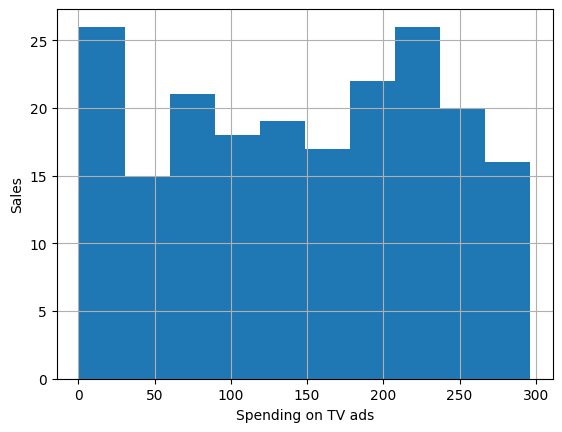

In [48]:
df['TV'].hist()
plt.xlabel('Spending on TV ads')
plt.ylabel('Sales')
plt.show()

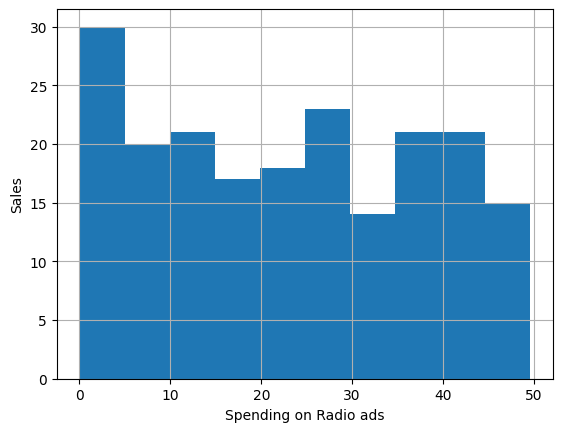

In [49]:
df['Radio'].hist()
plt.xlabel('Spending on Radio ads')
plt.ylabel('Sales')
plt.show()

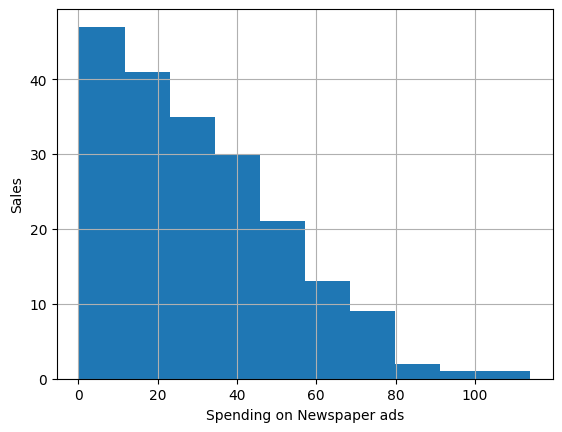

In [50]:
df['Newspaper'].hist()
plt.xlabel('Spending on Newspaper ads')
plt.ylabel('Sales')
plt.show()

VIF
==

In [44]:
#creating a df without target
feat_df=df[['TV', 'Radio', 'Newspaper']]

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['features']=feat_df.columns
vif_data['VIF'] = [variance_inflation_factor(feat_df.values, i) for i in range(feat_df.shape[1])]

In [46]:
vif_data

,features,VIF
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


VIF = 1: No multicollinearity. The predictor is not correlated with other predictors.

1 < VIF < 5: Moderate multicollinearity. The predictor has some correlation with other predictors, but it is generally acceptable.

VIF ≥ 5: High multicollinearity. The predictor is highly correlated with other predictors, which may be problematic.

VIF ≥ 10: Very high multicollinearity. The predictor is extremely correlated with other predictors, and it is likely to cause issues in the regression model.

--------------------------------------------

In [52]:
#Splitting the data
from sklearn.model_selection import train_test_split

x=df[['TV', 'Radio', 'Newspaper']]
y=df['Sales']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

Model Building
==

In [53]:
from sklearn.linear_model import LinearRegression

linear=LinearRegression()

linear.fit(x_train,y_train)

LinearRegression()

In [54]:
#predicting

y_pred=linear.predict(x_test)

Validation
==

In [55]:
from sklearn.metrics import r2_score,mean_squared_error

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

2.541624036229148
0.9091484341849799


Visualising and checking the assumptions of multiple linear regression
==

In [56]:
# Multicolinearity check other than VIF


# Calculate correlation matrix
correlation_matrix = df[['TV', 'Radio', 'Newspaper']].corr()
print(correlation_matrix)


                 TV     Radio  Newspaper
TV         1.000000  0.054809   0.056648
Radio      0.054809  1.000000   0.354104
Newspaper  0.056648  0.354104   1.000000


In [59]:
#Residual graph

y_result=linear.predict(x)

residual=y-y_result

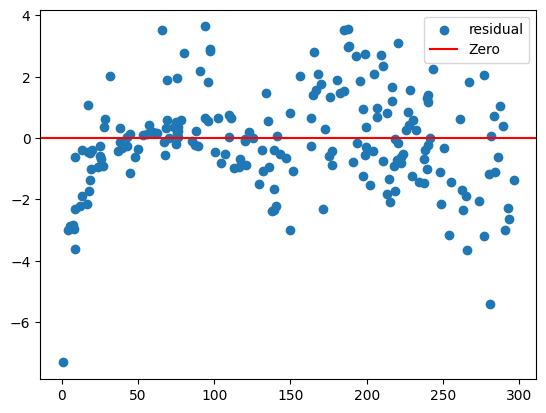

In [64]:
plt.scatter(df['TV'],residual,label='residual')
plt.axhline(y=0,color='red',label='Zero')
plt.legend()
plt.show()

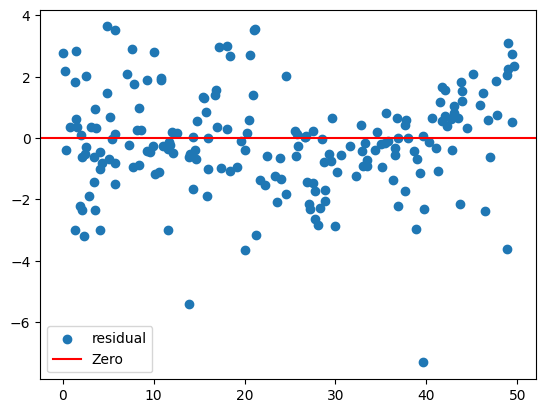

In [65]:
plt.scatter(df['Radio'],residual,label='residual')
plt.axhline(y=0,color='red',label='Zero')
plt.legend()
plt.show()

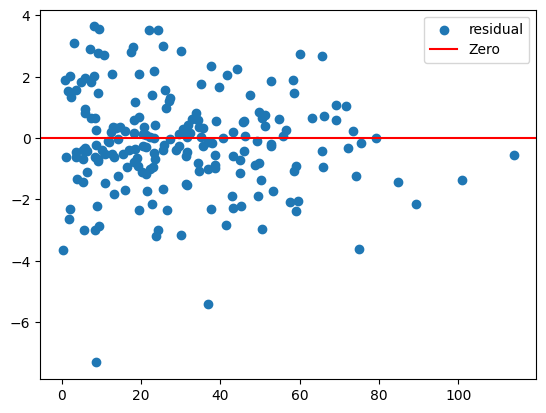

In [66]:
plt.scatter(df['Newspaper'],residual,label='residual')
plt.axhline(y=0,color='red',label='Zero')
plt.legend()
plt.show()